## Setups and imports

**Imports**

In [235]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy
import seaborn as sns

from scipy.stats import zscore
from collections import Counter
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from datetime import datetime

from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

**Dataset loading and opening**

In [238]:
# Dataset
data = pd.DataFrame(pd.read_csv('data.csv'))
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,Q91E,country,dateload,introelapse,testelapse,surveyelapse,gender,engnat,age,IE
0,5,51,7107,3,91,2522,1,56,6180,2,...,4609,US,2019-02-20 17:35:52,1,461,16,2,1,23,3
1,5,39,6354,5,13,3092,1,12,5243,5,...,10409,AU,2019-02-20 17:46:32,21,467,15,1,2,25,2
2,3,17,5397,4,35,2747,5,40,5262,3,...,2691,BR,2019-02-20 18:10:24,56,306,17,1,2,19,1
3,5,41,3055,2,14,3348,1,13,5141,1,...,3697,CZ,2019-02-20 18:16:21,2,287,14,1,1,23,1
4,1,76,2542,2,54,1878,1,15,5637,1,...,1662,CA,2019-02-20 18:21:49,2,325,12,1,1,18,2


In [239]:
data.shape

(7188, 282)

In [242]:
data.describe()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,Q91A,Q91I,Q91E,introelapse,testelapse,surveyelapse,gender,engnat,age,IE
count,7188.000000,7188.000000,7.188000e+03,7188.000000,7188.000000,7.188000e+03,7188.000000,7188.000000,7.188000e+03,7188.000000,...,7188.000000,7188.000000,7.188000e+03,7.188000e+03,7.188000e+03,7.188000e+03,7188.000000,7188.000000,7.188000e+03,7188.000000
mean,3.716055,45.990818,1.232196e+04,3.428492,45.722593,1.886704e+04,3.458125,45.902476,1.830787e+04,3.166388,...,2.391208,45.521842,5.617112e+03,1.563320e+03,1.516260e+03,2.903364e+03,1.623678,1.306483,1.235132e+03,1.626461
std,1.488674,26.271732,5.754300e+05,1.478393,26.609030,9.836502e+05,1.512086,26.115185,1.014611e+06,1.507506,...,1.443135,26.174255,4.089489e+04,3.103143e+04,2.526853e+04,9.832530e+04,0.562876,0.465868,1.023245e+05,0.856315
min,1.000000,1.000000,5.330000e+02,1.000000,1.000000,5.000000e+02,1.000000,1.000000,5.070000e+02,1.000000,...,1.000000,1.000000,5.130000e+02,1.000000e+00,1.480000e+02,2.000000e+00,0.000000,0.000000,1.400000e+01,0.000000
25%,2.000000,23.000000,2.992000e+03,2.000000,22.000000,2.366750e+03,2.000000,23.000000,3.426000e+03,2.000000,...,1.000000,23.000000,2.539750e+03,3.000000e+00,3.050000e+02,1.400000e+01,1.000000,1.000000,1.800000e+01,1.000000
50%,4.000000,45.000000,3.912500e+03,4.000000,45.000000,3.100000e+03,4.000000,46.000000,4.605500e+03,3.000000,...,2.000000,45.000000,3.410000e+03,7.000000e+00,3.820000e+02,1.800000e+01,2.000000,1.000000,2.200000e+01,1.000000
75%,5.000000,69.000000,5.285000e+03,5.000000,69.000000,4.265250e+03,5.000000,69.000000,6.433750e+03,5.000000,...,4.000000,68.000000,4.805000e+03,3.600000e+01,5.080000e+02,2.400000e+01,2.000000,2.000000,3.000000e+01,2.000000
max,5.000000,91.000000,4.876287e+07,5.000000,91.000000,8.050821e+07,5.000000,91.000000,8.601586e+07,5.000000,...,5.000000,91.000000,3.053623e+06,1.902817e+06,1.405436e+06,6.376603e+06,3.000000,2.000000,8.675309e+06,3.000000


## Data quality handling

**Missing Values**

Assess the number of missing values:

In [246]:
# Check for missing values
columns = data.columns
for name in columns:
    print(f"{name}: {data[name].isna().unique()}")

Q1A: [False]
Q1I: [False]
Q1E: [False]
Q2A: [False]
Q2I: [False]
Q2E: [False]
Q3A: [False]
Q3I: [False]
Q3E: [False]
Q4A: [False]
Q4I: [False]
Q4E: [False]
Q5A: [False]
Q5I: [False]
Q5E: [False]
Q6A: [False]
Q6I: [False]
Q6E: [False]
Q7A: [False]
Q7I: [False]
Q7E: [False]
Q8A: [False]
Q8I: [False]
Q8E: [False]
Q9A: [False]
Q9I: [False]
Q9E: [False]
Q10A: [False]
Q10I: [False]
Q10E: [False]
Q11A: [False]
Q11I: [False]
Q11E: [False]
Q12A: [False]
Q12I: [False]
Q12E: [False]
Q13A: [False]
Q13I: [False]
Q13E: [False]
Q14A: [False]
Q14I: [False]
Q14E: [False]
Q15A: [False]
Q15I: [False]
Q15E: [False]
Q16A: [False]
Q16I: [False]
Q16E: [False]
Q17A: [False]
Q17I: [False]
Q17E: [False]
Q18A: [False]
Q18I: [False]
Q18E: [False]
Q19A: [False]
Q19I: [False]
Q19E: [False]
Q20A: [False]
Q20I: [False]
Q20E: [False]
Q21A: [False]
Q21I: [False]
Q21E: [False]
Q22A: [False]
Q22I: [False]
Q22E: [False]
Q23A: [False]
Q23I: [False]
Q23E: [False]
Q24A: [False]
Q24I: [False]
Q24E: [False]
Q25A: [False]
Q25I:

In [248]:
print(f"Country att/>ribute null sum: {data['country'].isna().sum()}")
print(f"Unique values in country column: {data['country'].unique()}")

Country att/>ribute null sum: 2
Unique values in country column: ['US' 'AU' 'BR' 'CZ' 'CA' 'MX' 'IN' 'GB' 'PH' 'NONE' 'DE' 'PY' 'FI' 'GR'
 'SG' 'PL' 'OM' 'NZ' 'MY' 'KR' 'SK' 'RO' 'ID' 'PE' 'IT' 'CY' 'UA' 'LT'
 'KY' 'SE' 'RS' 'NL' 'FR' 'TT' 'RU' 'HR' 'IE' 'ZA' 'AL' 'HU' 'BE' 'PT'
 'CO' 'HN' 'MN' 'GH' 'JP' 'AE' 'BA' 'CR' 'LK' 'NO' 'VN' 'AT' 'CL' 'JM'
 'CH' 'DK' 'TR' 'ES' 'AR' 'BN' 'NG' 'TH' 'CN' 'EC' 'GE' 'TW' 'SI' 'HK'
 'BG' 'UY' 'MU' 'LV' 'PK' 'AG' 'GU' 'KE' 'EG' 'IS' 'IL' 'KZ' 'DZ' 'BY'
 'SA' 'SC' 'ME' 'MA' 'MT' 'BS' 'MK' 'ZM' 'TZ' 'SV' 'JO' 'BH' 'LB' 'VE'
 'AX' 'AM' 'ZW' nan 'LU' 'EE' 'MD' 'NP' 'SO' 'TN' 'KW' 'QA' 'PA' 'BB' 'JE'
 'GI' 'PR' 'GT' 'AZ' 'TC' 'KN' 'SY' 'DO' 'RW']


In [250]:
print(Counter(data['country']))

Counter({'US': 3417, 'GB': 517, 'CA': 448, 'AU': 323, 'DE': 193, 'NONE': 185, 'IN': 150, 'PH': 127, 'ID': 109, 'BR': 91, 'PL': 91, 'RO': 77, 'MY': 76, 'NL': 74, 'NZ': 70, 'FR': 68, 'SE': 65, 'FI': 63, 'SG': 62, 'IT': 58, 'RU': 48, 'PT': 41, 'ES': 38, 'NO': 35, 'IE': 34, 'MX': 32, 'ZA': 31, 'GR': 27, 'CZ': 26, 'DK': 26, 'TR': 26, 'RS': 25, 'BE': 24, 'AR': 24, 'HR': 23, 'CH': 22, 'HU': 21, 'LT': 19, 'NG': 19, 'PK': 17, 'JP': 16, 'AT': 16, 'KE': 16, 'UA': 15, 'HK': 15, 'TH': 14, 'VN': 13, 'SI': 13, 'BG': 13, 'CN': 10, 'IL': 10, 'SK': 9, 'AE': 9, 'KR': 8, 'CO': 8, 'CL': 8, 'BY': 8, 'LB': 8, 'PY': 7, 'GE': 7, 'MA': 6, 'TT': 5, 'AL': 5, 'BA': 5, 'CR': 5, 'JM': 5, 'TW': 5, 'DZ': 5, 'SA': 5, 'PE': 4, 'EC': 4, 'MK': 4, 'EE': 4, 'MN': 3, 'LV': 3, 'EG': 3, 'ME': 3, 'BS': 3, 'VE': 3, 'AM': 3, 'MD': 3, 'NP': 3, 'CY': 2, 'KY': 2, 'HN': 2, 'LK': 2, 'BN': 2, 'UY': 2, 'MU': 2, 'IS': 2, 'MT': 2, 'ZM': 2, nan: 2, 'QA': 2, 'PA': 2, 'GT': 2, 'OM': 1, 'GH': 1, 'AG': 1, 'GU': 1, 'KZ': 1, 'SC': 1, 'TZ': 1, 'S

The total number of missing values in 187, which is around 2.6% of the total dataset. We conclude that dropping the missing values will not have significant impact.

In [254]:
data = data.dropna()

for country in data['country']:
    idx = data[data['country']=='NONE'].index
    data = data.drop(idx)

In [255]:
print(f"Country att/>ribute null sum: {data['country'].isna().sum()}")
print(f"Unique values in country column: {data['country'].unique()}")

Country att/>ribute null sum: 0
Unique values in country column: ['US' 'AU' 'BR' 'CZ' 'CA' 'MX' 'IN' 'GB' 'PH' 'DE' 'PY' 'FI' 'GR' 'SG'
 'PL' 'OM' 'NZ' 'MY' 'KR' 'SK' 'RO' 'ID' 'PE' 'IT' 'CY' 'UA' 'LT' 'KY'
 'SE' 'RS' 'NL' 'FR' 'TT' 'RU' 'HR' 'IE' 'ZA' 'AL' 'HU' 'BE' 'PT' 'CO'
 'HN' 'MN' 'GH' 'JP' 'AE' 'BA' 'CR' 'LK' 'NO' 'VN' 'AT' 'CL' 'JM' 'CH'
 'DK' 'TR' 'ES' 'AR' 'BN' 'NG' 'TH' 'CN' 'EC' 'GE' 'TW' 'SI' 'HK' 'BG'
 'UY' 'MU' 'LV' 'PK' 'AG' 'GU' 'KE' 'EG' 'IS' 'IL' 'KZ' 'DZ' 'BY' 'SA'
 'SC' 'ME' 'MA' 'MT' 'BS' 'MK' 'ZM' 'TZ' 'SV' 'JO' 'BH' 'LB' 'VE' 'AX'
 'AM' 'ZW' 'LU' 'EE' 'MD' 'NP' 'SO' 'TN' 'KW' 'QA' 'PA' 'BB' 'JE' 'GI'
 'PR' 'GT' 'AZ' 'TC' 'KN' 'SY' 'DO' 'RW']


In [256]:
print(Counter(data['country']))

Counter({'US': 3417, 'GB': 517, 'CA': 448, 'AU': 323, 'DE': 193, 'IN': 150, 'PH': 127, 'ID': 109, 'BR': 91, 'PL': 91, 'RO': 77, 'MY': 76, 'NL': 74, 'NZ': 70, 'FR': 68, 'SE': 65, 'FI': 63, 'SG': 62, 'IT': 58, 'RU': 48, 'PT': 41, 'ES': 38, 'NO': 35, 'IE': 34, 'MX': 32, 'ZA': 31, 'GR': 27, 'CZ': 26, 'DK': 26, 'TR': 26, 'RS': 25, 'BE': 24, 'AR': 24, 'HR': 23, 'CH': 22, 'HU': 21, 'LT': 19, 'NG': 19, 'PK': 17, 'JP': 16, 'AT': 16, 'KE': 16, 'UA': 15, 'HK': 15, 'TH': 14, 'VN': 13, 'SI': 13, 'BG': 13, 'CN': 10, 'IL': 10, 'SK': 9, 'AE': 9, 'KR': 8, 'CO': 8, 'CL': 8, 'BY': 8, 'LB': 8, 'PY': 7, 'GE': 7, 'MA': 6, 'TT': 5, 'AL': 5, 'BA': 5, 'CR': 5, 'JM': 5, 'TW': 5, 'DZ': 5, 'SA': 5, 'PE': 4, 'EC': 4, 'MK': 4, 'EE': 4, 'MN': 3, 'LV': 3, 'EG': 3, 'ME': 3, 'BS': 3, 'VE': 3, 'AM': 3, 'MD': 3, 'NP': 3, 'CY': 2, 'KY': 2, 'HN': 2, 'LK': 2, 'BN': 2, 'UY': 2, 'MU': 2, 'IS': 2, 'MT': 2, 'ZM': 2, 'QA': 2, 'PA': 2, 'GT': 2, 'OM': 1, 'GH': 1, 'AG': 1, 'GU': 1, 'KZ': 1, 'SC': 1, 'TZ': 1, 'SV': 1, 'JO': 1, 'BH':

**Data format**

We will now ensure that the data types match the significance of the columns. We will also be ensuring that any non-numerical values are changed to numerical ones.

In [259]:
for column_name in columns:
    print(f"{column_name} data type: {data[column_name].dtype}")

Q1A data type: int64
Q1I data type: int64
Q1E data type: int64
Q2A data type: int64
Q2I data type: int64
Q2E data type: int64
Q3A data type: int64
Q3I data type: int64
Q3E data type: int64
Q4A data type: int64
Q4I data type: int64
Q4E data type: int64
Q5A data type: int64
Q5I data type: int64
Q5E data type: int64
Q6A data type: int64
Q6I data type: int64
Q6E data type: int64
Q7A data type: int64
Q7I data type: int64
Q7E data type: int64
Q8A data type: int64
Q8I data type: int64
Q8E data type: int64
Q9A data type: int64
Q9I data type: int64
Q9E data type: int64
Q10A data type: int64
Q10I data type: int64
Q10E data type: int64
Q11A data type: int64
Q11I data type: int64
Q11E data type: int64
Q12A data type: int64
Q12I data type: int64
Q12E data type: int64
Q13A data type: int64
Q13I data type: int64
Q13E data type: int64
Q14A data type: int64
Q14I data type: int64
Q14E data type: int64
Q15A data type: int64
Q15I data type: int64
Q15E data type: int64
Q16A data type: int64
Q16I data type:

In [260]:
for column_name in columns:
    if column_name.endswith('A'):
        unique_values = data[column_name].unique()
        unique_values.sort()
        print(f"{column_name}: {unique_values}")
        print('---------------------------------------------')

Q1A: [1 2 3 4 5]
---------------------------------------------
Q2A: [1 2 3 4 5]
---------------------------------------------
Q3A: [1 2 3 4 5]
---------------------------------------------
Q4A: [1 2 3 4 5]
---------------------------------------------
Q5A: [1 2 3 4 5]
---------------------------------------------
Q6A: [1 2 3 4 5]
---------------------------------------------
Q7A: [1 2 3 4 5]
---------------------------------------------
Q8A: [1 2 3 4 5]
---------------------------------------------
Q9A: [1 2 3 4 5]
---------------------------------------------
Q10A: [1 2 3 4 5]
---------------------------------------------
Q11A: [1 2 3 4 5]
---------------------------------------------
Q12A: [1 2 3 4 5]
---------------------------------------------
Q13A: [1 2 3 4 5]
---------------------------------------------
Q14A: [1 2 3 4 5]
---------------------------------------------
Q15A: [1 2 3 4 5]
---------------------------------------------
Q16A: [1 2 3 4 5]
-------------------------------

In [261]:
for column_name in columns:
    if column_name.endswith('I'):
        unique_values = data[column_name].unique()
        print(f"{column_name}: min: {min(unique_values)} and max: {max(unique_values)}")
        print("-------------------------------")

Q1I: min: 1 and max: 91
-------------------------------
Q2I: min: 1 and max: 91
-------------------------------
Q3I: min: 1 and max: 91
-------------------------------
Q4I: min: 1 and max: 91
-------------------------------
Q5I: min: 1 and max: 91
-------------------------------
Q6I: min: 1 and max: 91
-------------------------------
Q7I: min: 1 and max: 91
-------------------------------
Q8I: min: 1 and max: 91
-------------------------------
Q9I: min: 1 and max: 91
-------------------------------
Q10I: min: 1 and max: 91
-------------------------------
Q11I: min: 1 and max: 91
-------------------------------
Q12I: min: 1 and max: 91
-------------------------------
Q13I: min: 1 and max: 91
-------------------------------
Q14I: min: 1 and max: 91
-------------------------------
Q15I: min: 1 and max: 91
-------------------------------
Q16I: min: 1 and max: 91
-------------------------------
Q17I: min: 1 and max: 91
-------------------------------
Q18I: min: 1 and max: 91
---------------

In [262]:
unique_gender = data['gender'].unique()
unique_engnat = data['engnat'].unique()
unique_ie = data['IE'].unique()
unique_countries = data['country'].unique()

print(f"Unique genders: {unique_gender} \n Unique engnat: {unique_engnat} \n Unique IE: {unique_ie} \n Unique countries: {unique_countries}")

Unique genders: [2 1 3 0] 
 Unique engnat: [1 2 0] 
 Unique IE: [3 2 1 0] 
 Unique countries: ['US' 'AU' 'BR' 'CZ' 'CA' 'MX' 'IN' 'GB' 'PH' 'DE' 'PY' 'FI' 'GR' 'SG'
 'PL' 'OM' 'NZ' 'MY' 'KR' 'SK' 'RO' 'ID' 'PE' 'IT' 'CY' 'UA' 'LT' 'KY'
 'SE' 'RS' 'NL' 'FR' 'TT' 'RU' 'HR' 'IE' 'ZA' 'AL' 'HU' 'BE' 'PT' 'CO'
 'HN' 'MN' 'GH' 'JP' 'AE' 'BA' 'CR' 'LK' 'NO' 'VN' 'AT' 'CL' 'JM' 'CH'
 'DK' 'TR' 'ES' 'AR' 'BN' 'NG' 'TH' 'CN' 'EC' 'GE' 'TW' 'SI' 'HK' 'BG'
 'UY' 'MU' 'LV' 'PK' 'AG' 'GU' 'KE' 'EG' 'IS' 'IL' 'KZ' 'DZ' 'BY' 'SA'
 'SC' 'ME' 'MA' 'MT' 'BS' 'MK' 'ZM' 'TZ' 'SV' 'JO' 'BH' 'LB' 'VE' 'AX'
 'AM' 'ZW' 'LU' 'EE' 'MD' 'NP' 'SO' 'TN' 'KW' 'QA' 'PA' 'BB' 'JE' 'GI'
 'PR' 'GT' 'AZ' 'TC' 'KN' 'SY' 'DO' 'RW']


In [263]:
print(Counter(data['gender']))
print(Counter(data['engnat']))
print(Counter(data['IE']))

Counter({2: 4075, 1: 2642, 3: 195, 0: 89})
Counter({1: 4853, 2: 2132, 0: 16})
Counter({1: 4294, 3: 1716, 2: 967, 0: 24})


In [264]:
# Some corrections for above for user data

# Gender - Assume 0 is choice non-disclosure, so merge it with 3 (other)
for gender in data['gender']:
    if gender == 0:
        idx = data[data['gender']==0].index
        data.loc[idx, 'gender'] = 3

unique_genders = data['gender'].unique()
print(f"Unique genders: {unique_genders}")


# Engnat - Assume 0 is choice of non-disclosure, hence assumed that it is 2 (non-English) for analysis purposes
for eng in data['engnat']:
    if eng == 0:
        idx = data[data['engnat']==0].index
        data.loc[idx, 'engnat'] = 2
    
unique_engnat = data['engnat'].unique()
print(f"Unique engnat: {unique_engnat}")

# IE - Assume 0 is choice of non-disclose, hence assumed that it is 3 (No)
for ie in data['IE']:
    if ie ==0:
        idx = data[data['IE']==0].index
        data.loc[idx, 'IE'] = 3

unique_ie = data['IE'].unique()
print(f"Unique IE: {unique_ie}")

Unique genders: [2 1 3]
Unique engnat: [1 2]
Unique IE: [3 2 1]


In [265]:
unique_ages = data['age'].unique()
print(f"Unique ages: {unique_ages}")

Unique ages: [     23      25      19      18      22      20      15      51      53
      21      69      30      14      26      24      17      29      32
      16      40      28      59      33      38      31      50      64
      56      44      45      54      62      37      39      58      48
      34      35      27      43      68      42      36      60      57
      61      52      55      47      49      79      41      81      65
      46      72    1990      70      71      77      67     255      66
      63      78    1991 8675309      75    2003    1983      73      90
    1979    1999    1996]


To note: ages have outliers and incorrect data.

Decompose the dataset for easier analysis.

In [268]:
def extract_columns(dataset, ending_letter):
    output_data = pd.DataFrame({ending_letter: []})
    for column_name in dataset.columns:
        if column_name.endswith(ending_letter):
            extracted_column = dataset[column_name]
            output_data.insert(loc = 1, column = column_name, value = extracted_column.values)
    output_data = output_data.drop([ending_letter], axis = 1)
    return output_data

In [269]:
e_data = extract_columns(dataset = data, ending_letter = 'E')
a_data = extract_columns(dataset = data, ending_letter = 'A')
i_data = extract_columns(dataset = data, ending_letter = 'I')

In [270]:
e_data = e_data.drop(['IE'], axis = 1)
e_data.head()

,Q91E,Q90E,Q89E,Q88E,Q87E,Q86E,Q85E,Q84E,Q83E,Q82E,...,Q10E,Q9E,Q8E,Q7E,Q6E,Q5E,Q4E,Q3E,Q2E,Q1E
0,4609,4648,11548,883,7304,3674,2496,3423,2115,2446,...,6928,5759,5676,10188,2726,6646,5365,6180,2522,7107
1,10409,3884,2827,5095,9578,1820,2181,2749,12717,2456,...,17651,3909,5548,6215,2885,4027,8563,5243,3092,6354
2,2691,1759,3337,2935,2034,2891,2150,2552,2214,1644,...,2561,3219,1681,2435,2359,4338,3822,5262,2747,5397
3,3697,2345,3198,5562,2427,2298,664,1975,1619,1606,...,5096,4152,2622,2852,1757,2478,2925,5141,3348,3055
4,1662,6413,4024,7224,799,817,2182,2043,1122,2165,...,704,4066,4926,1731,3024,3082,2020,5637,1878,2542


In [271]:
i_data.head()

,Q91I,Q90I,Q89I,Q88I,Q87I,Q86I,Q85I,Q84I,Q83I,Q82I,...,Q10I,Q9I,Q8I,Q7I,Q6I,Q5I,Q4I,Q3I,Q2I,Q1I
0,35,40,4,67,60,12,58,68,47,61,...,13,48,15,11,23,74,66,56,91,51
1,1,28,90,80,2,47,77,88,19,7,...,25,71,84,54,79,75,3,12,13,39
2,19,87,41,46,29,7,55,39,63,12,...,81,82,16,42,68,21,80,40,35,17
3,23,15,40,2,64,74,28,60,9,65,...,71,62,48,63,8,33,42,13,14,41
4,69,86,7,33,83,28,66,46,68,63,...,21,56,38,49,44,59,13,15,54,76


In [272]:
a_data.head()

,Q91A,Q90A,Q89A,Q88A,Q87A,Q86A,Q85A,Q84A,Q83A,Q82A,...,Q10A,Q9A,Q8A,Q7A,Q6A,Q5A,Q4A,Q3A,Q2A,Q1A
0,3,3,4,5,2,4,1,2,3,1,...,5,4,3,3,2,3,2,1,3,5
1,3,4,4,4,3,1,2,2,2,1,...,3,1,2,5,2,2,5,1,5,5
2,1,1,2,3,5,4,5,5,5,5,...,5,5,5,5,5,4,3,5,4,3
3,3,3,4,4,5,3,5,5,5,5,...,2,4,4,5,5,5,1,1,2,5
4,5,5,5,2,1,3,1,1,3,2,...,4,3,1,5,3,3,1,1,2,1


In [273]:
metadata = pd.DataFrame({'M': []})
for column_name in data.columns:
    endings = ['A', 'E', 'I']
    if column_name[-1] not in endings:
        extracted_column = data[column_name]
        metadata.insert(loc = 1, column = column_name, value = extracted_column.values)
        
metadata = metadata.drop(['M'], axis = 1)

In [274]:
metadata.head()

,age,engnat,gender,surveyelapse,testelapse,introelapse,dateload,country
0,23,1,2,16,461,1,2019-02-20 17:35:52,US
1,25,2,1,15,467,21,2019-02-20 17:46:32,AU
2,19,2,1,17,306,56,2019-02-20 18:10:24,BR
3,23,1,1,14,287,2,2019-02-20 18:16:21,CZ
4,18,1,1,12,325,2,2019-02-20 18:21:49,CA


## Outliers

In [276]:
# First separate the columns that have continuous/measured data. These are most likely to have outliers
# Also include data that is discreet but non-categorical

possible_outliers = ['age', 'introelapse', 'testelapse', 'surveyelapse']

outliers_pd = pd.DataFrame({'O': []})

for column_name in data.columns:
    if column_name in possible_outliers:
        extracted_column = data[column_name]
        outliers_pd.insert(loc = 1, column = column_name, value = extracted_column.values)
outliers_pd = outliers_pd.drop(['O'], axis = 1)

print(outliers_pd.shape)
outliers_pd.head()

(7001, 4)


,age,surveyelapse,testelapse,introelapse
0,23,16,461,1
1,25,15,467,21
2,19,17,306,56
3,23,14,287,2
4,18,12,325,2


Text(0.5, 1.0, 'introelapse')

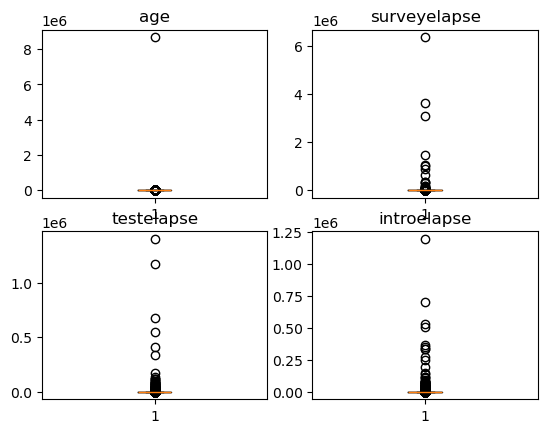

In [277]:
fig, axes = plt.subplots(2, 2)

# Boxplots
axes[0, 0].boxplot(outliers_pd['age'])
axes[0, 1].boxplot(outliers_pd['surveyelapse'])
axes[1, 0].boxplot(outliers_pd['testelapse'])
axes[1, 1].boxplot(outliers_pd['introelapse'])

# Setting titles
axes[0, 0].set_title('age')
axes[0, 1].set_title('surveyelapse')
axes[1, 0].set_title('testelapse')
axes[1, 1].set_title('introelapse')

{'whiskers': [<matplotlib.lines.Line2D at 0x307956150>,
 'caps': [<matplotlib.lines.Line2D at 0x307957610>,
 'boxes': [<matplotlib.lines.Line2D at 0x177bf0050>],
 'medians': [<matplotlib.lines.Line2D at 0x177c3b990>],
 'fliers': [<matplotlib.lines.Line2D at 0x177c39ed0>],
 'means': []}

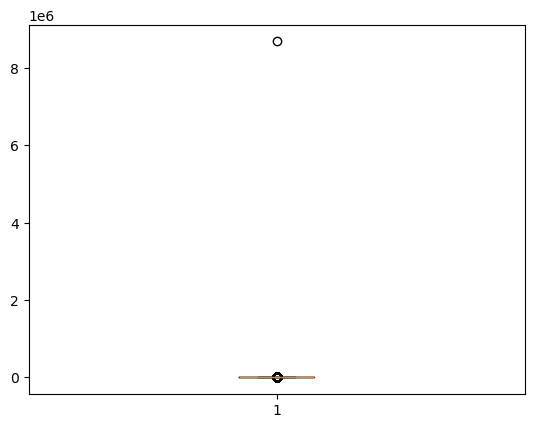

In [278]:
plt.boxplot(data['age'])

(array([7.e+03, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
        0.e+00, 1.e+00]),
 array([1.4000000e+01, 8.6754350e+05, 1.7350730e+06, 2.6026025e+06,
        3.4701320e+06, 4.3376615e+06, 5.2051910e+06, 6.0727205e+06,
        6.9402500e+06, 7.8077795e+06, 8.6753090e+06]),
 <BarContainer object of 10 artists>)

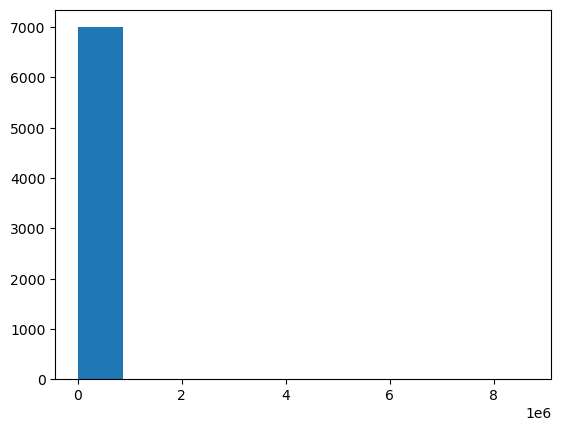

In [279]:
plt.hist(data['age'])

In [280]:
data['age'].head()

0    23
1    25
2    19
3    23
4    18
Name: age, dtype: int64

In [281]:
age_median = data['age'].median()
age_mean = data['age'].mean()
age_std = data['age'].std()
print(f"Median is {age_median} \nMean is {age_mean} \nStandard Deviation is {age_std}")

Median is 22.0 
Mean is 1267.410941294101 
Standard Deviation is 103682.05365808119


Mean looks weird, so let's use IQR to detect outliers instead and replace them with the median.

In [283]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [284]:
data['isAgeOutlier'] = 0

for age in data['age']:
    if (age > upper_bound) or (age < lower_bound):
        idx = data[data['age']==age].index
        data.loc[idx, 'isAgeOutlier'] = 1

In [285]:
data['isAgeOutlier'].unique()

array([0, 1])

In [286]:
data['isAgeOutlier'].head()

0    0
1    0
2    0
3    0
4    0
Name: isAgeOutlier, dtype: int64

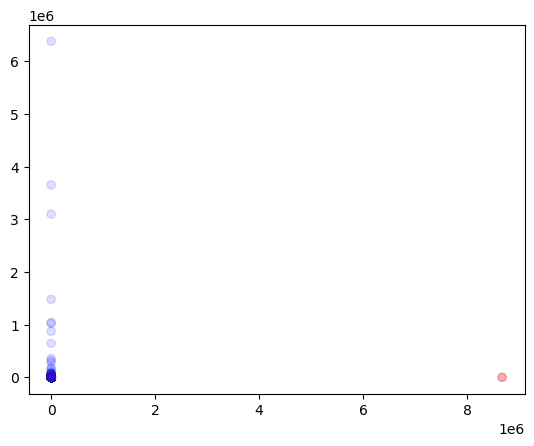

In [287]:
isOne = (data['isAgeOutlier']==1)
outliers_colour = {False: "#0011ff22",
                  True: "#e80c1e55"}
col = isOne.map(outliers_colour)
plt.scatter(data['age'], data['surveyelapse'], c=col)

In [288]:
ages_as_years = [1990, 1991, 2003, 1983, 1979, 1999, 1996]
def calculate_age(year):
    age = 2019 - year
    return age


for age in data['age']:
    if age in ages_as_years:
        new_age = calculate_age(age)
        idx = data[data['age']==age].index
        data.loc[idx, 'age'] = new_age

print(data['age'].unique())

[     23      25      19      18      22      20      15      51      53
      21      69      30      14      26      24      17      29      32
      16      40      28      59      33      38      31      50      64
      56      44      45      54      62      37      39      58      48
      34      35      27      43      68      42      36      60      57
      61      52      55      47      49      79      41      81      65
      46      72      70      71      77      67     255      66      63
      78 8675309      75      73      90]


In [289]:
age_mean = data['age'].mean()
age_median = data['age'].median()
age_std = data['age'].std()

print(f"Mean: {age_mean} \nMedian: {age_median} \nStandard deviation: {age_std}")

Mean: 1265.166976146265 
Median: 22.0 
Standard deviation: 103682.05921649458


In [290]:
ages = data.drop(['age'], axis = 1)

In [291]:
data = data.drop(['isAgeOutlier'], axis = 1)

## Distribution Checks

([<matplotlib.patches.Wedge at 0x310335c10>,
 [Text(-0.3834539996974104, 1.0310009845369008, '1'),
  Text(-0.45327964986619307, -1.0022662116509673, '2'),
  Text(0.7813869055694713, -0.7742315569676596, '3')])

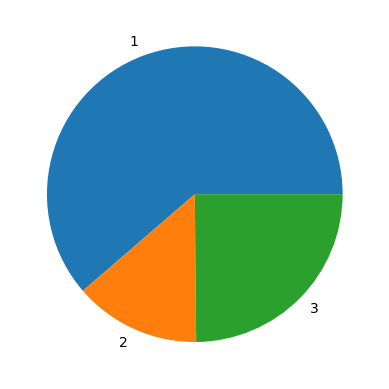

In [293]:
categories = {'1': 0,
              '2': 0,
              '3': 0}
for key in data['IE']:
    key = str(key)
    categories[key] += 1
categories = dict(categories)

plt.pie(categories.values(), labels = categories.keys())

In [294]:
print(categories)

{'1': 4294, '2': 967, '3': 1740}


In [295]:
a_data.head()

,Q91A,Q90A,Q89A,Q88A,Q87A,Q86A,Q85A,Q84A,Q83A,Q82A,...,Q10A,Q9A,Q8A,Q7A,Q6A,Q5A,Q4A,Q3A,Q2A,Q1A
0,3,3,4,5,2,4,1,2,3,1,...,5,4,3,3,2,3,2,1,3,5
1,3,4,4,4,3,1,2,2,2,1,...,3,1,2,5,2,2,5,1,5,5
2,1,1,2,3,5,4,5,5,5,5,...,5,5,5,5,5,4,3,5,4,3
3,3,3,4,4,5,3,5,5,5,5,...,2,4,4,5,5,5,1,1,2,5
4,5,5,5,2,1,3,1,1,3,2,...,4,3,1,5,3,3,1,1,2,1


In [296]:
a_data.head()

,Q91A,Q90A,Q89A,Q88A,Q87A,Q86A,Q85A,Q84A,Q83A,Q82A,...,Q10A,Q9A,Q8A,Q7A,Q6A,Q5A,Q4A,Q3A,Q2A,Q1A
0,3,3,4,5,2,4,1,2,3,1,...,5,4,3,3,2,3,2,1,3,5
1,3,4,4,4,3,1,2,2,2,1,...,3,1,2,5,2,2,5,1,5,5
2,1,1,2,3,5,4,5,5,5,5,...,5,5,5,5,5,4,3,5,4,3
3,3,3,4,4,5,3,5,5,5,5,...,2,4,4,5,5,5,1,1,2,5
4,5,5,5,2,1,3,1,1,3,2,...,4,3,1,5,3,3,1,1,2,1


In [297]:
e_data.head()

,Q91E,Q90E,Q89E,Q88E,Q87E,Q86E,Q85E,Q84E,Q83E,Q82E,...,Q10E,Q9E,Q8E,Q7E,Q6E,Q5E,Q4E,Q3E,Q2E,Q1E
0,4609,4648,11548,883,7304,3674,2496,3423,2115,2446,...,6928,5759,5676,10188,2726,6646,5365,6180,2522,7107
1,10409,3884,2827,5095,9578,1820,2181,2749,12717,2456,...,17651,3909,5548,6215,2885,4027,8563,5243,3092,6354
2,2691,1759,3337,2935,2034,2891,2150,2552,2214,1644,...,2561,3219,1681,2435,2359,4338,3822,5262,2747,5397
3,3697,2345,3198,5562,2427,2298,664,1975,1619,1606,...,5096,4152,2622,2852,1757,2478,2925,5141,3348,3055
4,1662,6413,4024,7224,799,817,2182,2043,1122,2165,...,704,4066,4926,1731,3024,3082,2020,5637,1878,2542


In [298]:
i_data.head()

,Q91I,Q90I,Q89I,Q88I,Q87I,Q86I,Q85I,Q84I,Q83I,Q82I,...,Q10I,Q9I,Q8I,Q7I,Q6I,Q5I,Q4I,Q3I,Q2I,Q1I
0,35,40,4,67,60,12,58,68,47,61,...,13,48,15,11,23,74,66,56,91,51
1,1,28,90,80,2,47,77,88,19,7,...,25,71,84,54,79,75,3,12,13,39
2,19,87,41,46,29,7,55,39,63,12,...,81,82,16,42,68,21,80,40,35,17
3,23,15,40,2,64,74,28,60,9,65,...,71,62,48,63,8,33,42,13,14,41
4,69,86,7,33,83,28,66,46,68,63,...,21,56,38,49,44,59,13,15,54,76


In [299]:
a_data.describe()

,Q91A,Q90A,Q89A,Q88A,Q87A,Q86A,Q85A,Q84A,Q83A,Q82A,...,Q10A,Q9A,Q8A,Q7A,Q6A,Q5A,Q4A,Q3A,Q2A,Q1A
count,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,...,7001.000000,7001.00000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000
mean,2.394658,2.983145,2.713755,3.597058,2.458934,3.377660,2.496786,3.639766,3.545779,3.051707,...,3.964434,3.58306,3.134695,4.178260,3.461220,3.782745,3.164976,3.458220,3.423797,3.716041
std,1.443337,1.403771,1.458197,1.181784,1.365307,1.384994,1.423285,1.340335,1.306444,1.466740,...,1.240745,1.44093,1.491212,1.152112,1.383976,1.223727,1.508379,1.513654,1.479073,1.490134
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,3.000000,2.000000,...,3.000000,2.00000,2.000000,4.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000
50%,2.000000,3.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,4.000000,3.000000,...,4.000000,4.00000,3.000000,5.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,5.000000,5.000000,4.000000,...,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [300]:
e_data.describe()

,Q91E,Q90E,Q89E,Q88E,Q87E,Q86E,Q85E,Q84E,Q83E,Q82E,...,Q10E,Q9E,Q8E,Q7E,Q6E,Q5E,Q4E,Q3E,Q2E,Q1E
count,7.001000e+03,7001.000000,7.001000e+03,7.001000e+03,7001.000000,7.001000e+03,7.001000e+03,7.001000e+03,7.001000e+03,7.001000e+03,...,7.001000e+03,7.001000e+03,7.001000e+03,7.001000e+03,7.001000e+03,7.001000e+03,7.001000e+03,7.001000e+03,7.001000e+03,7.001000e+03
mean,5.658219e+03,3394.437937,1.211840e+04,4.883887e+03,4754.971290,1.025506e+04,3.844338e+03,9.154585e+03,4.337119e+03,3.635791e+03,...,5.831032e+03,8.125279e+03,4.025782e+03,5.279934e+03,4.500304e+03,5.325723e+03,6.799476e+03,1.859154e+04,1.925385e+04,1.244220e+04
std,4.143474e+04,11369.524651,5.490368e+05,4.858145e+04,15216.827908,3.319715e+05,1.751877e+04,3.812298e+05,3.738041e+04,1.578686e+04,...,3.198424e+04,1.592423e+05,1.798791e+04,4.334384e+04,2.729239e+04,3.111568e+04,1.328518e+05,1.028069e+06,9.966993e+05,5.830487e+05
min,5.130000e+02,508.000000,5.630000e+02,5.110000e+02,586.000000,5.200000e+02,5.160000e+02,5.160000e+02,5.110000e+02,5.280000e+02,...,5.130000e+02,5.080000e+02,5.000000e+02,5.060000e+02,5.360000e+02,5.160000e+02,5.210000e+02,5.070000e+02,5.000000e+02,5.330000e+02
25%,2.536000e+03,1863.000000,2.328000e+03,2.161000e+03,2447.000000,1.862000e+03,2.038000e+03,2.249000e+03,1.999000e+03,1.906000e+03,...,2.922000e+03,3.016000e+03,2.133000e+03,2.372000e+03,2.215000e+03,2.551000e+03,2.782000e+03,3.418000e+03,2.364000e+03,2.992000e+03
50%,3.408000e+03,2390.000000,3.057000e+03,2.820000e+03,3206.000000,2.369000e+03,2.641000e+03,2.996000e+03,2.615000e+03,2.491000e+03,...,3.847000e+03,3.945000e+03,2.915000e+03,3.074000e+03,2.883000e+03,3.458000e+03,3.661000e+03,4.600000e+03,3.095000e+03,3.909000e+03
75%,4.804000e+03,3333.000000,4.346000e+03,3.965000e+03,4451.000000,3.302000e+03,3.728000e+03,4.200000e+03,3.690000e+03,3.460000e+03,...,5.371000e+03,5.433000e+03,4.206000e+03,4.301000e+03,4.071000e+03,4.978000e+03,5.027000e+03,6.408000e+03,4.253000e+03,5.280000e+03
max,3.053623e+06,731706.000000,4.486374e+07,3.966648e+06,773959.000000,2.148120e+07,1.313988e+06,3.176337e+07,2.919878e+06,1.102409e+06,...,1.698035e+06,1.080548e+07,1.412048e+06,2.792502e+06,2.114639e+06,1.943483e+06,1.092138e+07,8.601586e+07,8.050821e+07,4.876287e+07


In [301]:
i_data.describe()

,Q91I,Q90I,Q89I,Q88I,Q87I,Q86I,Q85I,Q84I,Q83I,Q82I,...,Q10I,Q9I,Q8I,Q7I,Q6I,Q5I,Q4I,Q3I,Q2I,Q1I
count,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,...,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000
mean,45.503500,46.111127,46.161548,45.799172,45.676189,45.635909,46.269390,46.343808,45.959863,46.611913,...,45.597915,46.560206,46.608199,45.958435,46.059420,46.005571,46.004285,45.881731,45.725611,46.113127
std,26.174923,26.396238,26.183354,26.237551,26.439643,26.278386,26.093365,26.296022,26.482322,26.215548,...,26.442971,26.241643,26.226400,26.134473,26.148819,26.235627,26.304529,26.140330,26.621302,26.254992
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,24.000000,24.000000,23.000000,24.000000,...,22.000000,24.000000,24.000000,23.000000,23.000000,23.000000,23.000000,23.000000,22.000000,23.000000
50%,45.000000,46.000000,46.000000,46.000000,46.000000,45.000000,46.000000,46.000000,46.000000,47.000000,...,46.000000,47.000000,47.000000,46.000000,46.000000,46.000000,46.000000,46.000000,45.000000,46.000000
75%,68.000000,69.000000,69.000000,68.000000,68.000000,68.000000,69.000000,69.000000,69.000000,70.000000,...,69.000000,69.000000,69.000000,68.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
max,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,...,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000


In [302]:
e_vars = []
for column in e_data.columns:
    if column == 'class':
        pass
    else:
        var = e_data[column].var()
        e_vars.append(var)

print(f"Length of variances: {len(e_vars)}")

Length of variances: 91


In [303]:
for var in e_vars:
    print(var)
    print('---')

1716837944.8105958
---
129266090.79132614
---
301441376397.5674
---
2360157376.4082284
---
231551851.58674672
---
110205104480.91977
---
306907418.8019119
---
145336197991.43
---
1397295043.0541668
---
249224798.08843163
---
422050861.5546001
---
315276693409.88403
---
829374402.4290788
---
3264254615.8959365
---
8997178813.356602
---
9618773664.897608
---
889623398.2315257
---
883629591.118544
---
1052302330.8389491
---
315104019.2059974
---
343409505.38130015
---
1716610427.4347303
---
536865701.97210443
---
85750085.48912409
---
31877385756.563885
---
246364449.8371655
---
347923916.0628079
---
134418667985.04744
---
822132580.1420926
---
888280377715.2034
---
275875723504.3984
---
4859881933.975054
---
1398014016.5863285
---
243249498907.24362
---
6431194574.1205845
---
839994717.5838192
---
3646425191.104522
---
796889637664.0654
---
1848399283.4066443
---
24015436570659.58
---
347299291954.3788
---
97735366756.30978
---
4870705182.699569
---
2184069623.035492
---
1317964456597.75

In [304]:
e_data = e_data.reindex(sorted(e_data.columns), axis = 1)
e_data.head()

,Q10E,Q11E,Q12E,Q13E,Q14E,Q15E,Q16E,Q17E,Q18E,Q19E,...,Q84E,Q85E,Q86E,Q87E,Q88E,Q89E,Q8E,Q90E,Q91E,Q9E
0,6928,2703,2822,6659,2739,2859,3466,3761,4171,2842,...,3423,2496,3674,7304,883,11548,5676,4648,4609,5759
1,17651,9559,6294,3979,3992,6224,2758,4101,1879,4274,...,2749,2181,1820,9578,5095,2827,5548,3884,10409,3909
2,2561,8847,2343,2690,2404,3471,2645,2052,1492,3273,...,2552,2150,2891,2034,2935,3337,1681,1759,2691,3219
3,5096,3922,2411,4007,2104,601,2415,1979,2117,2296,...,1975,664,2298,2427,5562,3198,2622,2345,3697,4152
4,704,3449,2641,2442,4023,4154,1397,2335,1644,1845,...,2043,2182,817,799,7224,4024,4926,6413,1662,4066


In [305]:
def e_handle_outliers(dataset, question_number):
    column_name = 'Q'+(str(question_number))+'E'
    dataset['isOutlier'] = 0
    dataset['z_score'] = 0
    
    median = dataset[column_name].median()
    std = dataset[column_name].std()
    mean = dataset[column_name].mean()
    
    for elapsed_time in dataset[column_name]:
        z_score = (elapsed_time - mean) / std
        idx = dataset[dataset[column_name] == elapsed_time].index
        dataset.loc[idx, 'z_score'] = z_score
        
    for z_score in dataset['z_score']:
        if (z_score < -3) or (z_score > 3):
            idx = dataset[dataset['z_score']==z_score].index
            dataset.loc[idx, 'isOutlier'] = 1
    
    for x in dataset['isOutlier']:
        if x == 1:
            idx = dataset[dataset['isOutlier']==1].index
            dataset.loc[idx, column_name] = median
    
    dataset = dataset.drop(columns = ['z_score', 'isOutlier'], axis = 1)
    return dataset

In [306]:
for x in range(1, 92):
    e_data = e_handle_outliers(dataset = e_data, question_number = x)

/var/folders/_s/w_mn47td4b5gtmlt064pn2rm0000gn/T/ipykernel_27613/1861900153.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.009150526605322345' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[idx, 'z_score'] = z_score
/var/folders/_s/w_mn47td4b5gtmlt064pn2rm0000gn/T/ipykernel_27613/1861900153.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.01678726213464502' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[idx, 'z_score'] = z_score
/var/folders/_s/w_mn47td4b5gtmlt064pn2rm0000gn/T/ipykernel_27613/1861900153.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.012072669578910143' has dtype incompatible with int64, please 

In [307]:
e_data.describe()

,Q10E,Q11E,Q12E,Q13E,Q14E,Q15E,Q16E,Q17E,Q18E,Q19E,...,Q84E,Q85E,Q86E,Q87E,Q88E,Q89E,Q8E,Q90E,Q91E,Q9E
count,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,...,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000
mean,4926.801028,5450.097129,3984.414369,5388.120983,3655.091987,4333.737466,3285.954578,3644.278532,3233.644908,4110.421511,...,4209.279103,3414.215255,3751.810027,4096.313384,4000.631481,4298.709042,3707.965719,3001.766462,4542.081274,5321.913869
std,5204.565358,9161.692396,2824.831191,5705.590672,4456.700238,4028.809757,3453.757459,5442.755368,3597.698118,9864.331793,...,9983.524845,3195.132522,15801.257959,3672.350991,5643.552851,8107.497246,3432.227507,2320.015352,5761.913729,8868.670226
min,513.000000,528.000000,505.000000,525.000000,523.000000,531.000000,532.000000,507.000000,506.000000,545.000000,...,516.000000,516.000000,520.000000,586.000000,511.000000,563.000000,500.000000,508.000000,513.000000,508.000000
25%,2922.000000,2974.000000,2506.000000,3172.000000,2216.000000,2723.000000,1908.000000,1982.000000,1822.000000,2264.000000,...,2249.000000,2038.000000,1862.000000,2447.000000,2161.000000,2328.000000,2133.000000,1863.000000,2536.000000,3016.000000
50%,3847.000000,3975.000000,3295.000000,4276.000000,2860.000000,3516.000000,2520.000000,2557.000000,2376.000000,2983.000000,...,2996.000000,2641.000000,2369.000000,3206.000000,2820.000000,3057.000000,2915.000000,2390.000000,3408.000000,3945.000000
75%,5363.000000,5551.000000,4520.000000,5761.000000,3912.000000,4724.000000,3519.000000,3592.000000,3434.000000,4149.000000,...,4196.000000,3716.000000,3298.000000,4431.000000,3944.000000,4345.000000,4199.000000,3319.000000,4783.000000,5429.000000
max,96298.000000,257254.000000,36746.000000,105145.000000,111215.000000,70224.000000,63909.000000,122740.000000,60298.000000,611478.000000,...,556483.000000,54060.000000,768201.000000,48888.000000,138574.000000,394153.000000,57686.000000,36736.000000,119750.000000,428969.000000


In [308]:
a_data.insert(loc = 1, column = 'class', value = data['IE'].values)
e_data.insert(loc = 1, column = 'class', value = data['IE'].values)
i_data.insert(loc = 1, column = 'class', value = data['IE'].values)
metadata.insert(loc = 1, column = 'class', value = data['IE'].values)

In [309]:
e_data['class'].head()

0    3
1    2
2    1
3    1
4    2
Name: class, dtype: int64

In [310]:
e_data.shape

(7001, 92)

In [311]:
metadata = metadata.drop(['age'], axis = 1)
metadata.head()

,class,engnat,gender,surveyelapse,testelapse,introelapse,dateload,country
0,3,1,2,16,461,1,2019-02-20 17:35:52,US
1,2,2,1,15,467,21,2019-02-20 17:46:32,AU
2,1,2,1,17,306,56,2019-02-20 18:10:24,BR
3,1,1,1,14,287,2,2019-02-20 18:16:21,CZ
4,2,1,1,12,325,2,2019-02-20 18:21:49,CA


In [312]:
metadata[['date', 'time']] = metadata['dateload'].str.split(' ', expand = True)
metadata.head()

,class,engnat,gender,surveyelapse,testelapse,introelapse,dateload,country,date,time
0,3,1,2,16,461,1,2019-02-20 17:35:52,US,2019-02-20,17:35:52
1,2,2,1,15,467,21,2019-02-20 17:46:32,AU,2019-02-20,17:46:32
2,1,2,1,17,306,56,2019-02-20 18:10:24,BR,2019-02-20,18:10:24
3,1,1,1,14,287,2,2019-02-20 18:16:21,CZ,2019-02-20,18:16:21
4,2,1,1,12,325,2,2019-02-20 18:21:49,CA,2019-02-20,18:21:49


In [313]:
metadata = metadata.drop(['dateload'], axis = 1)

In [314]:
print(metadata['time'].unique())
print('-----')
print(metadata['date'].unique())

['17:35:52' '17:46:32' '18:10:24' ... '13:29:47' '15:19:35' '15:38:29']
-----
['2019-02-20' '2019-02-21' '2019-02-22' '2019-02-23' '2019-02-24'
 '2019-02-25' '2019-02-26' '2019-02-27' '2019-02-28' '2019-03-01'
 '2019-03-02' '2019-03-03' '2019-03-04' '2019-03-05' '2019-03-06'
 '2019-03-07' '2019-03-08' '2019-03-09' '2019-03-10' '2019-03-11'
 '2019-03-12' '2019-03-13' '2019-03-14' '2019-03-15' '2019-03-16'
 '2019-03-17' '2019-03-18' '2019-03-19' '2019-03-20' '2019-03-21'
 '2019-03-22' '2019-03-23' '2019-03-24' '2019-03-25' '2019-03-26'
 '2019-03-27' '2019-03-28' '2019-03-29' '2019-03-30' '2019-03-31'
 '2019-04-01' '2019-04-02' '2019-04-03' '2019-04-04' '2019-04-05'
 '2019-04-06' '2019-04-07' '2019-04-08' '2019-04-09' '2019-04-10'
 '2019-04-11' '2019-04-12' '2019-04-13' '2019-04-14' '2019-04-15'
 '2019-04-16' '2019-04-17' '2019-04-18' '2019-04-19' '2019-04-20'
 '2019-04-21' '2019-04-22' '2019-04-23' '2019-04-24' '2019-04-25'
 '2019-04-26' '2019-04-27' '2019-04-28' '2019-04-29' '2019-04-30

In [315]:
metadata[['year', 'month', 'day']] = metadata['date'].str.split('-', expand = True)
metadata[['hours', 'minutes', 'seconds']] = metadata['time'].str.split(':', expand = True)

In [316]:
metadata.head()

,class,engnat,gender,surveyelapse,testelapse,introelapse,country,date,time,year,month,day,hours,minutes,seconds
0,3,1,2,16,461,1,US,2019-02-20,17:35:52,2019,02,20,17,35,52
1,2,2,1,15,467,21,AU,2019-02-20,17:46:32,2019,02,20,17,46,32
2,1,2,1,17,306,56,BR,2019-02-20,18:10:24,2019,02,20,18,10,24
3,1,1,1,14,287,2,CZ,2019-02-20,18:16:21,2019,02,20,18,16,21
4,2,1,1,12,325,2,CA,2019-02-20,18:21:49,2019,02,20,18,21,49


In [317]:
metadata = metadata.drop(columns = ['date', 'time', 'seconds','minutes', 'year'], axis = 1)

In [318]:
metadata.head()

,class,engnat,gender,surveyelapse,testelapse,introelapse,country,month,day,hours
0,3,1,2,16,461,1,US,02,20,17
1,2,2,1,15,467,21,AU,02,20,17
2,1,2,1,17,306,56,BR,02,20,18
3,1,1,1,14,287,2,CZ,02,20,18
4,2,1,1,12,325,2,CA,02,20,18


In [319]:
print(metadata['month'].unique())

['02' '03' '04' '05' '06' '07' '08']


In [320]:
print(metadata['day'].unique())

['20' '21' '22' '23' '24' '25' '26' '27' '28' '01' '02' '03' '04' '05'
 '06' '07' '08' '09' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19'
 '29' '30' '31']


In [321]:
print(metadata['hours'].unique())

['17' '18' '19' '20' '21' '22' '23' '00' '01' '02' '03' '04' '05' '06'
 '07' '08' '09' '10' '11' '12' '13' '14' '15' '16']


In [322]:
winter = ['02']
summer = ['06', '07', '08']
spring = ['03', '04', '05']

metadata['season'] = ''

for month in metadata['month']:
    idx = metadata[metadata['month']==month].index
    if month in winter:
        season = '-1'
    if month in spring:
        season = '0'
    if month in summer:
        season = '1'
    metadata.loc[idx, 'season'] = season

metadata['month'] = metadata['month'].astype(int)
metadata['season'] = metadata['season'].astype(int)

metadata.head()

,class,engnat,gender,surveyelapse,testelapse,introelapse,country,month,day,hours,season
0,3,1,2,16,461,1,US,2,20,17,-1
1,2,2,1,15,467,21,AU,2,20,17,-1
2,1,2,1,17,306,56,BR,2,20,18,-1
3,1,1,1,14,287,2,CZ,2,20,18,-1
4,2,1,1,12,325,2,CA,2,20,18,-1


In [323]:
print(metadata['season'].unique())

[-1  0  1]


In [324]:
morning = str([*range(5, 12, 1)])
afternoon = str([*range(12, 17, 1)])
evening = str([*range(17, 21, 1)])
night = [*range(21, 24, 1)]
night_after = [*range(0, 5, 1)]
night.extend(night_after)
night = str(night)

metadata['part_of_day'] = ''

for hour in metadata['hours']:
    idx = metadata[metadata['hours']==hour].index
    
    if hour in morning:
        part_of_day = '1'
    if hour in afternoon:
        part_of_day = '2'
    if hour in evening:
        part_of_day = '3'
    if hour in night:
        part_of_day = '4'

    metadata.loc[idx, 'part_of_day'] = part_of_day
    
metadata['part_of_day'] = metadata['part_of_day'].astype(int)

In [325]:
metadata.head()

,class,engnat,gender,surveyelapse,testelapse,introelapse,country,month,day,hours,season,part_of_day
0,3,1,2,16,461,1,US,2,20,17,-1,3
1,2,2,1,15,467,21,AU,2,20,17,-1,3
2,1,2,1,17,306,56,BR,2,20,18,-1,3
3,1,1,1,14,287,2,CZ,2,20,18,-1,3
4,2,1,1,12,325,2,CA,2,20,18,-1,3


In [326]:
metadata['part_of_day'].unique()

array([3, 4, 1, 2])

In [327]:
metadata['month'].unique()

array([2, 3, 4, 5, 6, 7, 8])

In [328]:
metadata['day'].unique()

array(['20', '21', '22', '23', '24', '25', '26', '27', '28', '01', '02',
       '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '29', '30', '31'], dtype=object)

In [329]:
metadata['day'] = metadata['day'].astype(int)
metadata['weekday'] = 1000

for index, row in metadata.iterrows():
    month = row['month']
    day = row['day']
    weekday = datetime(2019,month,day).isoweekday()
    metadata.at[index, 'weekday'] = weekday
    
metadata.head()

,class,engnat,gender,surveyelapse,testelapse,introelapse,country,month,day,hours,season,part_of_day,weekday
0,3,1,2,16,461,1,US,2,20,17,-1,3,3
1,2,2,1,15,467,21,AU,2,20,17,-1,3,3
2,1,2,1,17,306,56,BR,2,20,18,-1,3,3
3,1,1,1,14,287,2,CZ,2,20,18,-1,3,3
4,2,1,1,12,325,2,CA,2,20,18,-1,3,3


In [330]:
metadata['weekday'].unique()

array([3, 4, 5, 6, 7, 1, 2])

In [331]:
metadata = metadata.drop(['day'], axis = 1)

In [332]:
metadata.describe()

,class,engnat,gender,surveyelapse,testelapse,introelapse,month,season,part_of_day,weekday
count,7001.000000,7001.000000,7001.000000,7.001000e+03,7.001000e+03,7.001000e+03,7001.000000,7001.000000,7001.000000,7001.000000
mean,1.635195,1.306813,1.663191,2.975633e+03,1.519397e+03,1.299621e+03,4.944008,0.339523,3.030281,3.936295
std,0.853755,0.461204,0.551855,9.962844e+04,2.557468e+04,2.169674e+04,1.834512,0.604501,1.057327,2.008325
min,1.000000,1.000000,1.000000,2.000000e+00,1.480000e+02,1.000000e+00,2.000000,-1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.400000e+01,3.040000e+02,3.000000e+00,3.000000,0.000000,2.000000,2.000000
50%,1.000000,1.000000,2.000000,1.800000e+01,3.810000e+02,7.000000e+00,5.000000,0.000000,3.000000,4.000000
75%,2.000000,2.000000,2.000000,2.400000e+01,5.080000e+02,3.600000e+01,7.000000,1.000000,4.000000,6.000000
max,3.000000,2.000000,3.000000,6.376603e+06,1.405436e+06,1.196698e+06,8.000000,1.000000,4.000000,7.000000


In [333]:
metadata['country'].unique()

array(['US', 'AU', 'BR', 'CZ', 'CA', 'MX', 'IN', 'GB', 'PH', 'DE', 'PY',
       'FI', 'GR', 'SG', 'PL', 'OM', 'NZ', 'MY', 'KR', 'SK', 'RO', 'ID',
       'PE', 'IT', 'CY', 'UA', 'LT', 'KY', 'SE', 'RS', 'NL', 'FR', 'TT',
       'RU', 'HR', 'IE', 'ZA', 'AL', 'HU', 'BE', 'PT', 'CO', 'HN', 'MN',
       'GH', 'JP', 'AE', 'BA', 'CR', 'LK', 'NO', 'VN', 'AT', 'CL', 'JM',
       'CH', 'DK', 'TR', 'ES', 'AR', 'BN', 'NG', 'TH', 'CN', 'EC', 'GE',
       'TW', 'SI', 'HK', 'BG', 'UY', 'MU', 'LV', 'PK', 'AG', 'GU', 'KE',
       'EG', 'IS', 'IL', 'KZ', 'DZ', 'BY', 'SA', 'SC', 'ME', 'MA', 'MT',
       'BS', 'MK', 'ZM', 'TZ', 'SV', 'JO', 'BH', 'LB', 'VE', 'AX', 'AM',
       'ZW', 'LU', 'EE', 'MD', 'NP', 'SO', 'TN', 'KW', 'QA', 'PA', 'BB',
       'JE', 'GI', 'PR', 'GT', 'AZ', 'TC', 'KN', 'SY', 'DO', 'RW'],
      dtype=object)

In [334]:
encoder =  LabelEncoder()
metadata['encoded_country'] = encoder.fit_transform(metadata['country'])
countries = metadata.pop('country')
metadata.head()

,class,engnat,gender,surveyelapse,testelapse,introelapse,month,hours,season,part_of_day,weekday,encoded_country
0,3,1,2,16,461,1,2,17,-1,3,3,113
1,2,2,1,15,467,21,2,17,-1,3,3,6
2,1,2,1,17,306,56,2,18,-1,3,3,15
3,1,1,1,14,287,2,2,18,-1,3,3,25
4,2,1,1,12,325,2,2,18,-1,3,3,18


In [335]:
labels = metadata.pop('class')
labels.head()

0    3
1    2
2    1
3    1
4    2
Name: class, dtype: int64

In [336]:
countries.head()

0    US
1    AU
2    BR
3    CZ
4    CA
Name: country, dtype: object

In [337]:
metadata.head()

,engnat,gender,surveyelapse,testelapse,introelapse,month,hours,season,part_of_day,weekday,encoded_country
0,1,2,16,461,1,2,17,-1,3,3,113
1,2,1,15,467,21,2,17,-1,3,3,6
2,2,1,17,306,56,2,18,-1,3,3,15
3,1,1,14,287,2,2,18,-1,3,3,25
4,1,1,12,325,2,2,18,-1,3,3,18


In [338]:
#metadata = metadata.drop(['hours'], axis = 1)

In [339]:
kmeans = KMeans(n_clusters=3).fit(metadata)
y_kmeans = kmeans.predict(metadata)

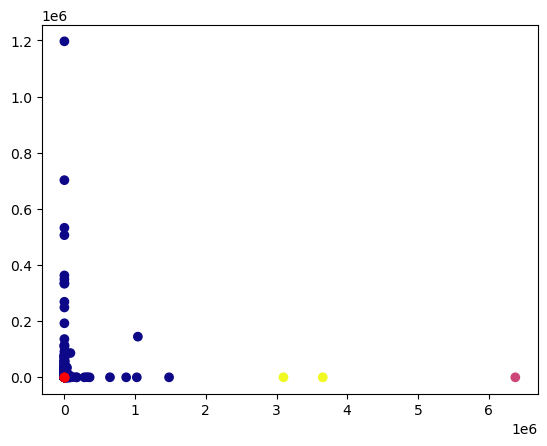

In [340]:
plt.scatter(metadata['surveyelapse'], metadata['introelapse'], c=y_kmeans, cmap='plasma')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0],  centers[:, 1], c='red')

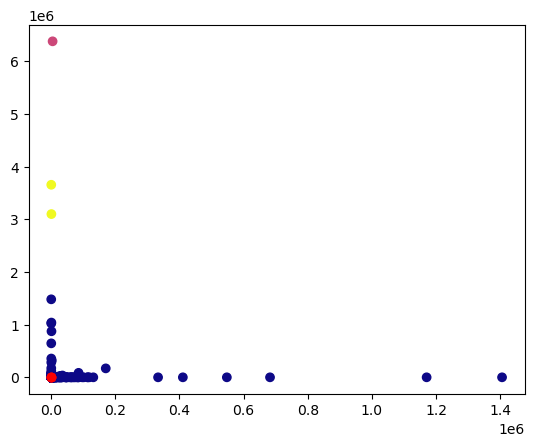

In [341]:
plt.scatter(metadata['testelapse'], metadata['surveyelapse'], c=y_kmeans, cmap='plasma')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0],  centers[:, 1], c='red')

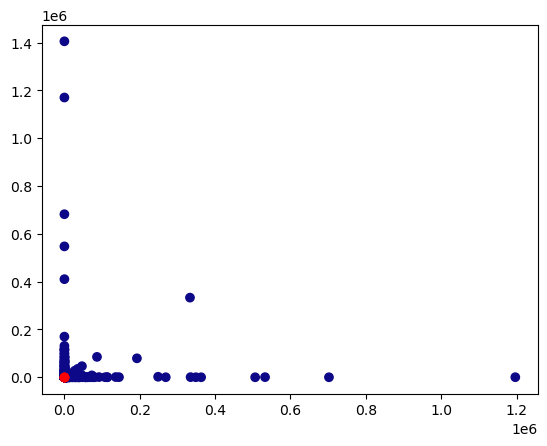

In [342]:
plt.scatter(metadata['introelapse'], metadata['testelapse'], c=y_kmeans, cmap = 'plasma')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0],  centers[:, 1], c='red')

(array([6.998e+03, 2.000e+00, 1.000e+00]),
 array([2.00000000e+00, 2.12553567e+06, 4.25106933e+06, 6.37660300e+06]),
 <BarContainer object of 3 artists>)

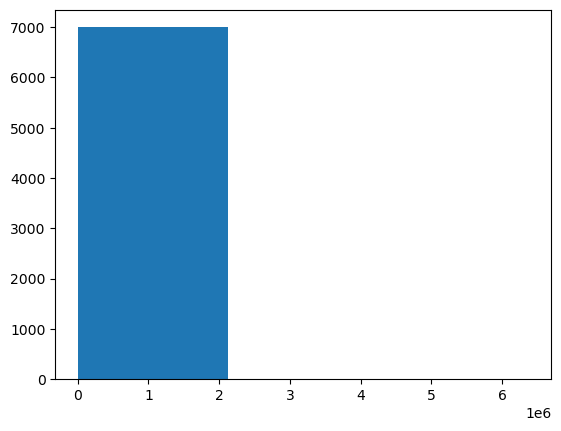

In [343]:
plt.hist(metadata['surveyelapse'], bins = 3)

(array([6.997e+03, 2.000e+00, 2.000e+00]),
 array([1.48000000e+02, 4.68577333e+05, 9.37006667e+05, 1.40543600e+06]),
 <BarContainer object of 3 artists>)

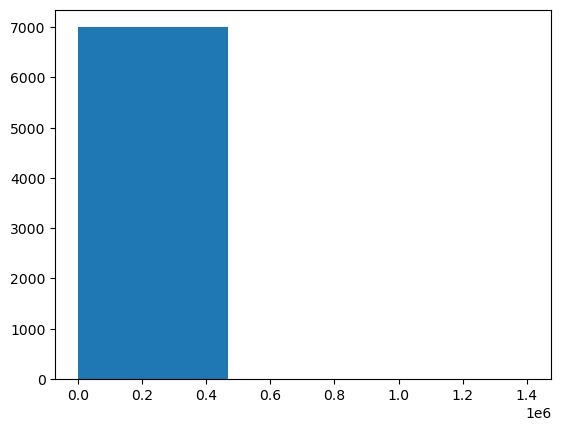

In [344]:
plt.hist(metadata['testelapse'], bins = 3)

(array([6.997e+03, 3.000e+00, 1.000e+00]),
 array([1.000000e+00, 3.989000e+05, 7.977990e+05, 1.196698e+06]),
 <BarContainer object of 3 artists>)

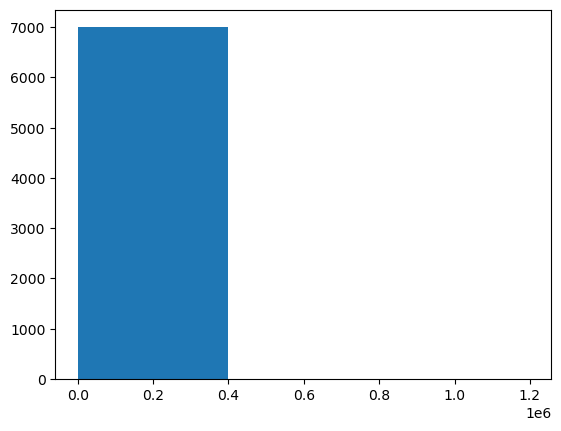

In [345]:
plt.hist(metadata['introelapse'], bins = 3)

In [346]:
metadata = metadata.drop(columns=['surveyelapse', 'testelapse','introelapse'])

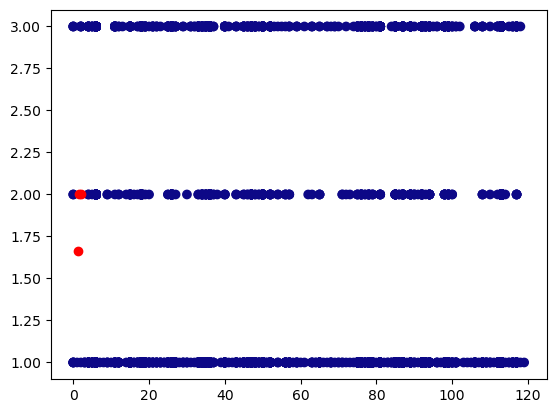

In [347]:
plt.scatter(metadata['encoded_country'], labels, c=y_kmeans, cmap = 'plasma')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0],  centers[:, 1], c='red')

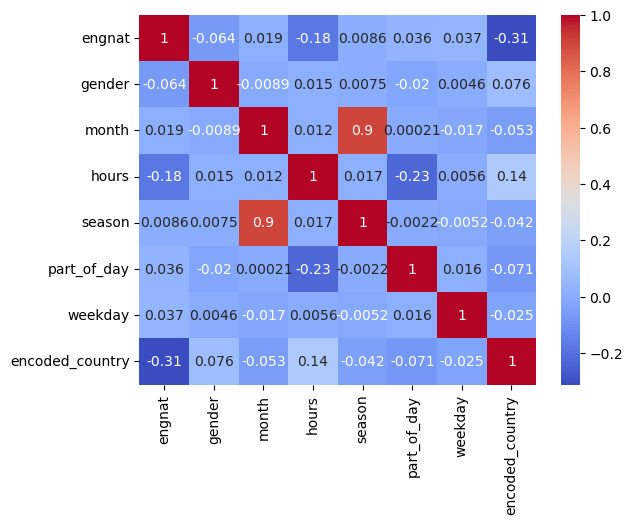

In [348]:
metadata_columns = metadata.columns
metadata_matrix = metadata[metadata_columns].corr()
sns.heatmap(metadata_matrix, annot=True, cmap = 'coolwarm')
plt.show()

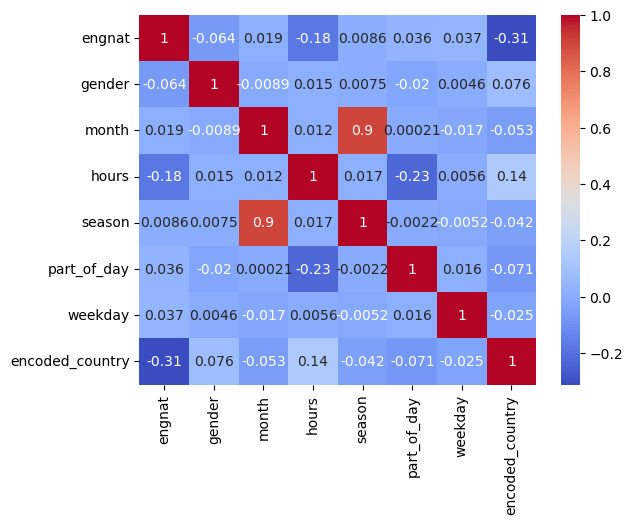

In [349]:
metadata_columns = metadata.columns
metadata_matrix = metadata[metadata_columns].corr()
sns.heatmap(metadata_matrix, annot=True, cmap = 'coolwarm')
plt.show()

In [350]:
kmeans_a = KMeans(n_clusters=3).fit(a_data)
y_kmeans_a = kmeans_a.predict(a_data)

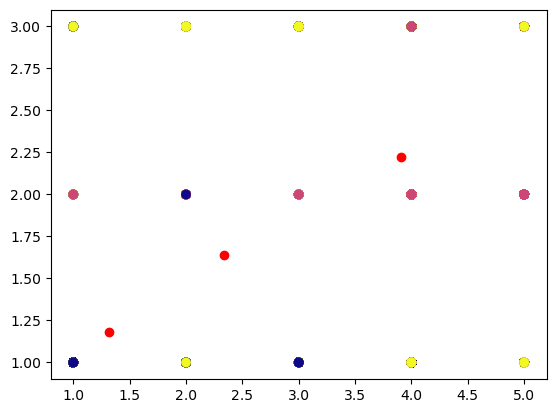

In [351]:
plt.scatter(a_data['Q13A'], labels, c=y_kmeans_a, cmap = 'plasma')
centers = kmeans_a.cluster_centers_
plt.scatter(centers[:, 0],  centers[:, 1], c='red')

In [352]:
a_data = a_data.drop(['class'], axis =1)
e_data = e_data.drop(['class'], axis = 1)

In [353]:
metadata.head()

,engnat,gender,month,hours,season,part_of_day,weekday,encoded_country
0,1,2,2,17,-1,3,3,113
1,2,1,2,17,-1,3,3,6
2,2,1,2,18,-1,3,3,15
3,1,1,2,18,-1,3,3,25
4,1,1,2,18,-1,3,3,18


In [354]:
metadata_tree = DecisionTreeClassifier(criterion='entropy')

In [355]:
X_train_metadata,X_test_metadata, y_train_metadata, y_test_metadata = train_test_split(metadata, labels, test_size = 0.2, random_state = 42, stratify=labels, shuffle = True)

In [356]:
smote = SMOTE(random_state=42)
X_metadata_smote, y_metadata_smote = smote.fit_resample(X_train_metadata, y_train_metadata)

In [357]:
metadata_tree.fit(X_metadata_smote, y_metadata_smote)
y_pred_metadata = metadata_tree.predict(X_test_metadata)

In [358]:
print(classification_report(y_test_metadata, y_pred_metadata))

              precision    recall  f1-score   support

           1       0.62      0.56      0.59       859
           2       0.15      0.19      0.17       194
           3       0.26      0.29      0.27       348

    accuracy                           0.44      1401
   macro avg       0.35      0.35      0.35      1401
weighted avg       0.47      0.44      0.46      1401



<Axes: >

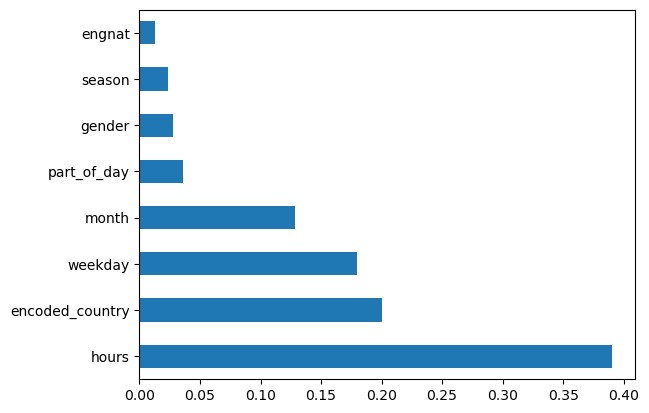

In [359]:
metadata_feature_importances = pd.Series(metadata_tree.feature_importances_, index = metadata.columns)
metadata_feature_importances.nlargest(10).plot(kind='barh')

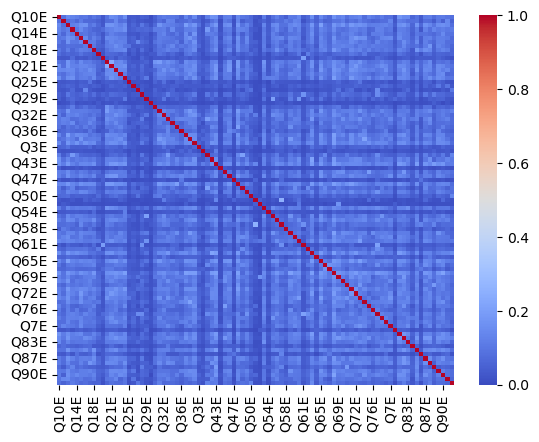

In [360]:
e_data_columns = e_data.columns
e_data_matrix = e_data[e_data_columns].corr()
sns.heatmap(e_data_matrix, annot=False, cmap = 'coolwarm')
plt.show()

In [361]:
e_data_tree = DecisionTreeClassifier(criterion='entropy')

In [362]:
X_train_e_data, X_test_e_data, y_train_e_data, y_test_e_data = train_test_split(e_data, labels, test_size = 0.2, random_state=45, stratify=labels, shuffle=True)
X_e_data_smote, y_e_data_smote = smote.fit_resample(X_train_e_data, y_train_e_data)

In [363]:
e_data_tree.fit(X_e_data_smote, y_e_data_smote)
y_pred_e_data = e_data_tree.predict(X_test_e_data)

In [364]:
print(classification_report(y_test_e_data, y_pred_e_data))

              precision    recall  f1-score   support

           1       0.68      0.52      0.59       859
           2       0.20      0.31      0.24       194
           3       0.24      0.30      0.27       348

    accuracy                           0.44      1401
   macro avg       0.37      0.38      0.37      1401
weighted avg       0.50      0.44      0.46      1401



<Axes: >

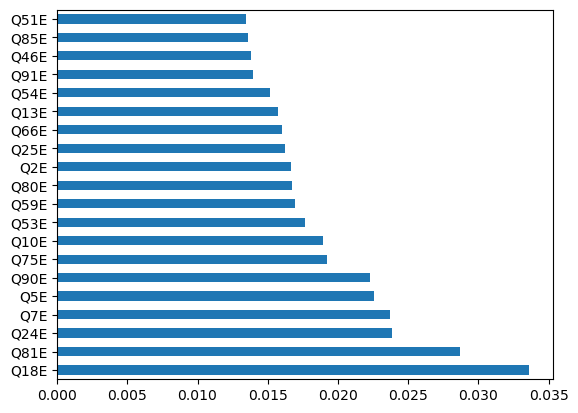

In [365]:
e_data_feature_importances = pd.Series(e_data_tree.feature_importances_, index = e_data.columns)
e_data_feature_importances.nlargest(20).plot(kind='barh')

In [366]:
a_data.head()

,Q91A,Q90A,Q89A,Q88A,Q87A,Q86A,Q85A,Q84A,Q83A,Q82A,...,Q10A,Q9A,Q8A,Q7A,Q6A,Q5A,Q4A,Q3A,Q2A,Q1A
0,3,3,4,5,2,4,1,2,3,1,...,5,4,3,3,2,3,2,1,3,5
1,3,4,4,4,3,1,2,2,2,1,...,3,1,2,5,2,2,5,1,5,5
2,1,1,2,3,5,4,5,5,5,5,...,5,5,5,5,5,4,3,5,4,3
3,3,3,4,4,5,3,5,5,5,5,...,2,4,4,5,5,5,1,1,2,5
4,5,5,5,2,1,3,1,1,3,2,...,4,3,1,5,3,3,1,1,2,1


In [367]:
a_data_tree = DecisionTreeClassifier(criterion = 'entropy')

In [368]:
X_train_a_data, X_test_a_data, y_train_a_data, y_test_a_data = train_test_split(a_data, labels, test_size = 0.2, random_state=42, stratify=labels, shuffle = True)

In [369]:
X_a_data_smote, y_a_data_smote = smote.fit_resample(X_train_a_data, y_train_a_data)

In [370]:
a_data_tree.fit(X_a_data_smote, y_a_data_smote)
y_pred_a_data = a_data_tree.predict(X_test_a_data)

In [371]:
print(classification_report(y_test_a_data, y_pred_a_data))

              precision    recall  f1-score   support

           1       0.80      0.71      0.75       859
           2       0.48      0.57      0.52       194
           3       0.36      0.42      0.39       348

    accuracy                           0.62      1401
   macro avg       0.55      0.57      0.55      1401
weighted avg       0.64      0.62      0.63      1401



<Axes: >

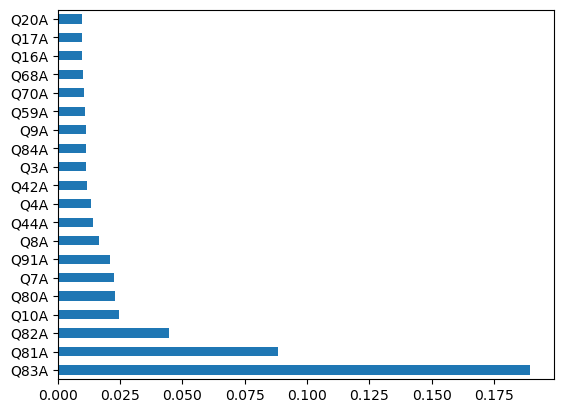

In [372]:
a_data_feature_importances = pd.Series(a_data_tree.feature_importances_, index = a_data.columns)
a_data_feature_importances.nlargest(20).plot(kind='barh')

In [373]:
selected_metadata = metadata[['hours','encoded_country','weekday','month']]
selected_e_data = e_data[['Q25E', 'Q13E','Q10E', 'Q80E','Q2E','Q75E','Q5E','Q90E','Q7E','Q24E','Q81E','Q18E']]
selected_a_data = a_data[['Q82A','Q81A','Q83A']]

final_data = pd.concat([selected_metadata,selected_e_data, selected_a_data], axis=1)

In [374]:
final_data['class'] = data['IE']

In [375]:
final_data.head()

,hours,encoded_country,weekday,month,Q25E,Q13E,Q10E,Q80E,Q2E,Q75E,Q5E,Q90E,Q7E,Q24E,Q81E,Q18E,Q82A,Q81A,Q83A,class
0,17,113,3,2,2407,6659,6928,6926,2522,2167,6646,4648,10188,4909,8118,4171,1,2,3,3.0
1,17,6,3,2,2308,3979,17651,4980,3092,2415,4027,3884,6215,4203,5906,1879,1,2,2,2.0
2,18,15,3,2,4404,2690,2561,3990,2747,3150,4338,1759,2435,6735,2400,1492,5,5,5,1.0
3,18,25,3,2,691,4007,5096,3384,3348,1812,2478,2345,2852,3071,1810,2117,5,5,5,1.0
4,18,18,3,2,1403,2442,704,1504,1878,1938,3082,6413,1731,2775,3725,1644,2,3,3,2.0


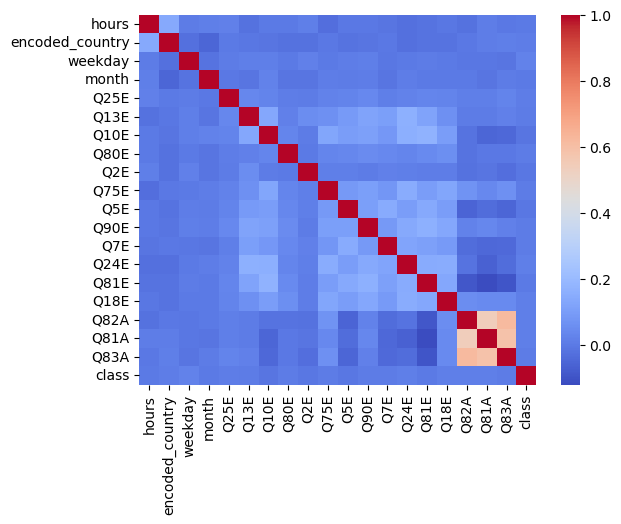

In [376]:
final_data_columns = final_data.columns
final_data_matrix = final_data[final_data_columns].corr()
sns.heatmap(final_data_matrix, annot=False, cmap='coolwarm')
plt.show()

In [377]:
final_data = final_data.drop(['class'], axis = 1)

In [378]:
X_train, X_test, y_train, y_test = train_test_split(final_data, labels, stratify = labels, shuffle = True, random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [379]:
baseline_clf = DecisionTreeClassifier(criterion='entropy')
baseline_clf.fit(X_smote, y_smote)
y_pred_baseline = baseline_clf.predict(X_test)

print(classification_report(y_test, y_pred_baseline))

              precision    recall  f1-score   support

           1       0.76      0.68      0.71      1074
           2       0.39      0.48      0.43       242
           3       0.30      0.34      0.32       435

    accuracy                           0.57      1751
   macro avg       0.48      0.50      0.49      1751
weighted avg       0.59      0.57      0.58      1751



In [380]:
# Hyperparameters for SVM
C = 1.0
kernel = 'rbf'
gamma = 'auto'
verbose = True
class_weight = 'balanced'

svc_clf = SVC(C=C, kernel=kernel, gamma=gamma, verbose=verbose, class_weight=class_weight)
svc_clf.fit(X_smote, y_smote)
y_pred_svc = svc_clf.predict(X_test)
print(classification_report(y_pred_svc, y_test))

[LibSVM]....
*...*
optimization finished, #iter = 7165
obj = -3214.505727, rho = -0.003362
nSV = 6440, nBSV = 3174
...*...*
optimization finished, #iter = 6452
obj = -3218.185866, rho = -0.001118
nSV = 6440, nBSV = 3198
....
*..*
optimization finished, #iter = 6789
obj = -3212.703855, rho = 0.002252
nSV = 6440, nBSV = 3173
Total nSV = 9660
              precision    recall  f1-score   support

           1       1.00      0.61      0.76      1751
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.61      1751
   macro avg       0.33      0.20      0.25      1751
weighted avg       1.00      0.61      0.76      1751



/Users/mohonaroy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mohonaroy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mohonaroy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


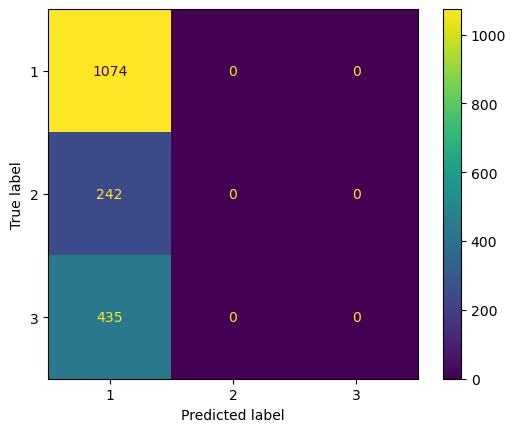

In [381]:
svc_confusion = confusion_matrix(y_test, y_pred_svc)
svc_matrix = ConfusionMatrixDisplay(confusion_matrix = svc_confusion, display_labels = ['1','2','3'])
svc_matrix.plot()

In [618]:
criterion = 'entropy'
n_estimators = 200

random_forest_clf = RandomForestClassifier(criterion = criterion , n_estimators = n_estimators)
random_forest_clf.fit(X_smote, y_smote)
y_pred_random_forest = random_forest_clf.predict(X_test)

print(classification_report(y_pred_random_forest, y_test))

              precision    recall  f1-score   support

           1       0.82      0.80      0.81      1096
           2       0.56      0.56      0.56       239
           3       0.41      0.43      0.42       416

    accuracy                           0.68      1751
   macro avg       0.60      0.60      0.60      1751
weighted avg       0.69      0.68      0.69      1751



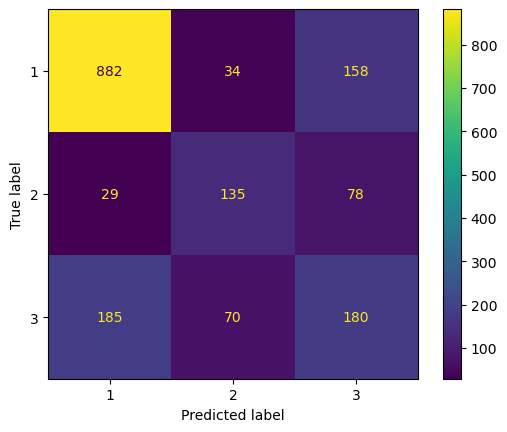

In [619]:
random_forest_confusion = confusion_matrix(y_test, y_pred_random_forest)
random_forest_cm = ConfusionMatrixDisplay(confusion_matrix = random_forest_confusion, display_labels = ['1','2','3'])
random_forest_cm.plot()